# Incidence du syndrome grippal

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import numpy as np

In [4]:
data_url = "https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv"

In [5]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202441          3   84683   74972.0   94394.0    127       112.0   
1     202440          3   84895   76454.0   93336.0    127       114.0   
2     202439          3   91660   82937.0  100383.0    137       124.0   
3     202438          3   91786   82903.0  100669.0    138       125.0   
4     202437          3   56460   49319.0   63601.0     85        74.0   
5     202436          3   33657   27906.0   39408.0     50        41.0   
6     202435          3   27404   22036.0   32772.0     41        33.0   
7     202434          3   26717   21003.0   32431.0     40        31.0   
8     202433          3   20623   15349.0   25897.0     31        23.0   
9     202432          3   23187   17532.0   28842.0     35        27.0   
10    202431          3   26035   20267.0   31803.0     39        30.0   
11    202430          3   36393   28593.0   44193.0     55        43.0   
12    202429          3   39560   32592.0   46528.0     59        49.0   
13    202428          3   54342   45781.0   62903.0     81        68.0   
14    202427          3   47364   40234.0   54494.0     71        60.0   
15    202426          3   44219   36956.0   51482.0     66        55.0   
16    202425          3   47204   40300.0   54108.0     71        61.0   
17    202424          3   41110   34671.0   47549.0     62        52.0   
18    202423          3   35875   30610.0   41140.0     54        46.0   
19    202422          3   33772   28274.0   39270.0     51        43.0   
20    202421          3   21963   17556.0   26370.0     33        26.0   
21    202420          3   20057   15780.0   24334.0     30        24.0   
22    202419          3   15375   11274.0   19476.0     23        17.0   
23    202418          3   22409   17653.0   27165.0     34        27.0   
24    202417          3   27042   21410.0   32674.0     41        33.0   
25    202416          3   28882   23305.0   34459.0     43        35.0   
26    202415          3   30229   24648.0   35810.0     45        37.0   
27    202414          3   31813   26529.0   37097.0     48        40.0   
28    202413          3   35090   29607.0   40573.0     53        45.0   
29    202412          3   40639   34582.0   46696.0     61        52.0   
...      ...        ...     ...       ...       ...    ...         ...   
2055  198521          3   26096   19621.0   32571.0     47        35.0   
2056  198520          3   27896   20885.0   34907.0     51        38.0   
2057  198519          3   43154   32821.0   53487.0     78        59.0   
2058  198518          3   40555   29935.0   51175.0     74        55.0   
2059  198517          3   34053   24366.0   43740.0     62        44.0   
2060  198516          3   50362   36451.0   64273.0     91        66.0   
2061  198515          3   63881   45538.0   82224.0    116        83.0   
2062  198514          3  134545  114400.0  154690.0    244       207.0   
2063  198513          3  197206  176080.0  218332.0    357       319.0   
2064  198512          3  245240  223304.0  267176.0    445       405.0   
2065  198511          3  276205  252399.0  300011.0    501       458.0   
2066  198510          3  353231  326279.0  380183.0    640       591.0   
2067  198509          3  369895  341109.0  398681.0    670       618.0   
2068  198508          3  389886  359529.0  420243.0    707       652.0   
2069  198507          3  471852  432599.0  511105.0    855       784.0   
2070  198506          3  565825  518011.0  613639.0   1026       939.0   
2071  198505          3  637302  592795.0  681809.0   1155      1074.0   
2072  198504          3  424937  390794.0  459080.0    770       708.0   
2073  198503          3  213901  174689.0  253113.0    388       317.0   
2074  198502          3   97586   80949.0  114223.0    177       147.0   
2075  198501          3   85489   65918.0  105060.0    155       120.0   
2076  198452          3   84830   60602.0  109058.0    154       110.0   
2077  198451

In [6]:
raw_data[raw_data.isnull().any(axis=1)]

week  indicator inc  inc_low  inc_up inc100  inc100_low  inc100_up  \
1848  198919          3   -      NaN     NaN      -         NaN        NaN   

     geo_insee geo_name  
1848        FR   France

In [7]:
data = raw_data.dropna().copy()
data


week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202441          3   84683   74972.0   94394.0    127       112.0   
1     202440          3   84895   76454.0   93336.0    127       114.0   
2     202439          3   91660   82937.0  100383.0    137       124.0   
3     202438          3   91786   82903.0  100669.0    138       125.0   
4     202437          3   56460   49319.0   63601.0     85        74.0   
5     202436          3   33657   27906.0   39408.0     50        41.0   
6     202435          3   27404   22036.0   32772.0     41        33.0   
7     202434          3   26717   21003.0   32431.0     40        31.0   
8     202433          3   20623   15349.0   25897.0     31        23.0   
9     202432          3   23187   17532.0   28842.0     35        27.0   
10    202431          3   26035   20267.0   31803.0     39        30.0   
11    202430          3   36393   28593.0   44193.0     55        43.0   
12    202429          3   39560   32592.0   46528.0     59        49.0   
13    202428          3   54342   45781.0   62903.0     81        68.0   
14    202427          3   47364   40234.0   54494.0     71        60.0   
15    202426          3   44219   36956.0   51482.0     66        55.0   
16    202425          3   47204   40300.0   54108.0     71        61.0   
17    202424          3   41110   34671.0   47549.0     62        52.0   
18    202423          3   35875   30610.0   41140.0     54        46.0   
19    202422          3   33772   28274.0   39270.0     51        43.0   
20    202421          3   21963   17556.0   26370.0     33        26.0   
21    202420          3   20057   15780.0   24334.0     30        24.0   
22    202419          3   15375   11274.0   19476.0     23        17.0   
23    202418          3   22409   17653.0   27165.0     34        27.0   
24    202417          3   27042   21410.0   32674.0     41        33.0   
25    202416          3   28882   23305.0   34459.0     43        35.0   
26    202415          3   30229   24648.0   35810.0     45        37.0   
27    202414          3   31813   26529.0   37097.0     48        40.0   
28    202413          3   35090   29607.0   40573.0     53        45.0   
29    202412          3   40639   34582.0   46696.0     61        52.0   
...      ...        ...     ...       ...       ...    ...         ...   
2055  198521          3   26096   19621.0   32571.0     47        35.0   
2056  198520          3   27896   20885.0   34907.0     51        38.0   
2057  198519          3   43154   32821.0   53487.0     78        59.0   
2058  198518          3   40555   29935.0   51175.0     74        55.0   
2059  198517          3   34053   24366.0   43740.0     62        44.0   
2060  198516          3   50362   36451.0   64273.0     91        66.0   
2061  198515          3   63881   45538.0   82224.0    116        83.0   
2062  198514          3  134545  114400.0  154690.0    244       207.0   
2063  198513          3  197206  176080.0  218332.0    357       319.0   
2064  198512          3  245240  223304.0  267176.0    445       405.0   
2065  198511          3  276205  252399.0  300011.0    501       458.0   
2066  198510          3  353231  326279.0  380183.0    640       591.0   
2067  198509          3  369895  341109.0  398681.0    670       618.0   
2068  198508          3  389886  359529.0  420243.0    707       652.0   
2069  198507          3  471852  432599.0  511105.0    855       784.0   
2070  198506          3  565825  518011.0  613639.0   1026       939.0   
2071  198505          3  637302  592795.0  681809.0   1155      1074.0   
2072  198504          3  424937  390794.0  459080.0    770       708.0   
2073  198503          3  213901  174689.0  253113.0    388       317.0   
2074  198502          3   97586   80949.0  114223.0    177       147.0   
2075  198501          3   85489   65918.0  105060.0    155       120.0   
2076  198452          3   84830   60602.0  109058.0    154       110.0   
2077  198451

In [18]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [19]:
 sorted_data = data.set_index('period').sort_index()

In [22]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

1989-05-01/1989-05-07 1989-05-15/1989-05-21


In [28]:
sorted_data['inc'] = sorted_data['inc'].replace('-', np.nan)

In [29]:
sorted_data['inc'].plot()


TypeError: Empty 'DataFrame': no numeric data to plot

In [30]:
print(sorted_data['inc'].head())  # Print the first few values of the 'inc' column

period
1984-10-29/1984-11-04     68422
1984-11-05/1984-11-11    135223
1984-11-12/1984-11-18     87330
1984-11-19/1984-11-25     72029
1984-11-26/1984-12-02     78620
Freq: W-SUN, Name: inc, dtype: object


In [31]:
print(sorted_data['inc'].isna().sum())

0


In [32]:
sorted_data['inc'] = pd.to_numeric(sorted_data['inc'], errors='coerce')  # Coerce any non-numeric values to NaN

In [33]:
sorted_data = sorted_data.dropna(subset=['inc'])  # Drop rows where 'inc' is NaN
# Alternatively, fill NaN values with 0 or the mean
# sorted_data['inc'] = sorted_data['inc'].fillna(0)  # Fill NaN with 0

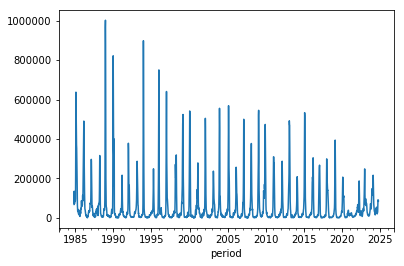

In [34]:
sorted_data['inc'].plot()

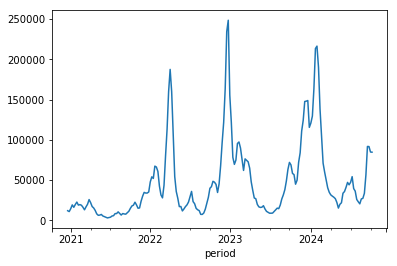

In [35]:
 sorted_data['inc'][-200:].plot()

In [36]:
 first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]


In [37]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

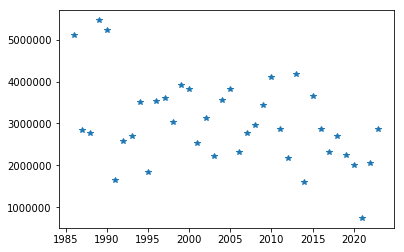

In [38]:
 yearly_incidence.plot(style='*')

In [39]:
yearly_incidence.sort_values()

2021     743449
2014    1600941
1991    1659249
1995    1840410
2020    2010315
2022    2060304
2012    2175217
2003    2234584
2019    2254386
2006    2307352
2017    2321583
2001    2529279
1992    2574578
1993    2703886
2018    2705325
1988    2765617
2007    2780164
1987    2855570
2016    2856393
2011    2857040
2023    2873501
2008    2973918
1998    3034904
2002    3125418
2009    3444020
1994    3514763
1996    3539413
2004    3567744
1997    3620066
2015    3654892
2000    3826372
2005    3835025
1999    3908112
2010    4111392
2013    4182691
1986    5115251
1990    5235827
1989    5466192
dtype: int64

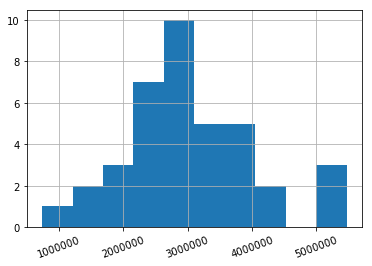

In [40]:
yearly_incidence.hist(xrot=20)